<h2>About this Project</h2>
<p>In this project, you will implement bagging and the random forest algorithm. </p>

<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong><p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
  <li><strong>Save your notebook.</strong></li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
</ol>
<p>You can also download a copy of this notebook in multiple formats using the <strong>Download as</strong> option in the <strong>File</strong> menu above.</p>

### Getting Started

Before you get started, let's import a few packages that you will need.

In [1]:
import numpy as np
from pylab import *
from numpy.matlib import repmat
import sys
import matplotlib 
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time
from helper import *
%matplotlib notebook

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.8


In addition, we'll create a 2D spiral dataset of size 150 for visualization and a high dimensional dataset <a href="https://archive.ics.uci.edu/ml/datasets/Ionosphere">ION</a>, which we will use as our binary test classification problem.

In [2]:
xTrSpiral,yTrSpiral,xTeSpiral,yTeSpiral= spiraldata(150)
xTrIon,yTrIon,xTeIon,yTeIon= iondata()

You will use the regression tree from a previous project. As a reminder, the following code shows you how to instantiate a decision tree:

In [37]:
# Create a regression tree with no restriction on its depth
# and weights for each training example to be 1
# if you want to create a tree of max_depth k
# then call RegressionTree(depth=k)
tree = RegressionTree(depth=np.inf)

# To fit/train the regression tree
tree.fit(xTrSpiral, yTrSpiral)

# To use the trained regression tree to predict a score for the example
score = tree.predict(xTrSpiral)

# To use the trained regression tree to make a +1/-1 prediction
pred = np.sign(tree.predict(xTrSpiral))
        
tr_err   = np.mean((np.sign(tree.predict(xTrSpiral)) - yTrSpiral)**2)
te_err   = np.mean((np.sign(tree.predict(xTeSpiral)) - yTeSpiral)**2)

print("Training error: %.4f" % np.mean(np.sign(tree.predict(xTrSpiral)) != yTrSpiral))
print("Testing error:  %.4f" % np.mean(np.sign(tree.predict(xTeSpiral)) != yTeSpiral))

Training error: 0.0000
Testing error:  0.0467


<p>The following code defines a function <code>visclassifier()</code>, which plots the decision boundary of a classifier in 2 dimensions. Execute the following code to see what the decision boundary of your tree looks like on the spiral data set. </p>

<IPython.core.display.Javascript object>


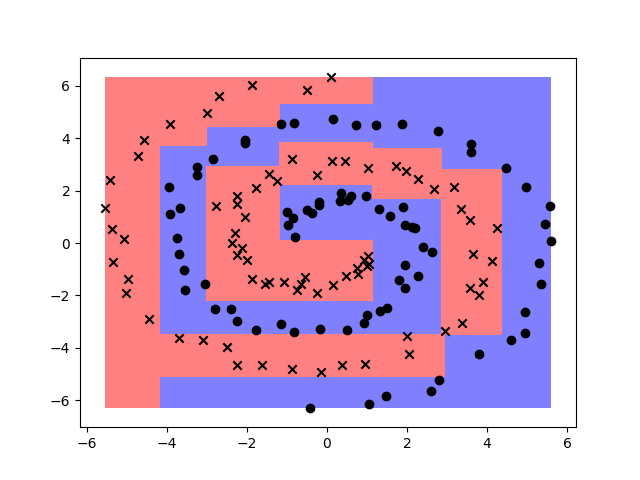

Training error: 0.0000
Testing error:  0.0467


In [38]:
def visclassifier(fun,xTr,yTr):
    """
    visualize decision boundary
    Define the symbols and colors we'll use in the plots later
    """

    yTr = np.array(yTr).flatten()
    
    symbols = ["ko","kx"]
    marker_symbols = ['o', 'x']
    mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
    # get the unique values from labels array
    classvals = np.unique(yTr)

    plt.figure()

    # return 300 evenly spaced numbers over this interval
    res=300
    xrange = np.linspace(min(xTr[:, 0]), max(xTr[:, 0]),res)
    yrange = np.linspace(min(xTr[:, 1]), max(xTr[:, 1]),res)
    
    # repeat this matrix 300 times for both axes
    pixelX = repmat(xrange, res, 1)
    pixelY = repmat(yrange, res, 1).T

    
    xTe = np.array([pixelX.flatten(), pixelY.flatten()]).T

    # test all of these points on the grid
    testpreds = fun(xTe)
    
    # reshape it back together to make our grid
    Z = testpreds.reshape(res, res)
    # Z[0,0] = 1 # optional: scale the colors correctly
    
    # fill in the contours for these predictions
    plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)

    # creates x's and o's for training set
    for idx, c in enumerate(classvals):
        plt.scatter(xTr[yTr == c,0],
            xTr[yTr == c,1],
            marker=marker_symbols[idx],
            color='k'
                   )

    plt.axis('tight')
    # shows figure and blocks
    plt.show()
    

tree=RegressionTree(depth=np.inf)
tree.fit(xTrSpiral,yTrSpiral) # compute tree on training data 
visclassifier(lambda X: tree.predict(X),xTrSpiral,yTrSpiral)
print("Training error: %.4f" % np.mean(np.sign(tree.predict(xTrSpiral)) != yTrSpiral))
print("Testing error:  %.4f" % np.mean(np.sign(tree.predict(xTeSpiral)) != yTeSpiral))

<h2>Bagging in Action</h2>
<h3>Part One: Implement <code>forest</code> [Graded]</h3>
<p>CART trees are known to be high variance classifiers
(if trained to full depth).
    An effective way to prevent overfitting is to use <b>Bagging</b> (short for <strong>b</strong>ootstrap <strong>ag</strong>gregating).
Implement the function <code>forest</code>,
which builds a forest of regression trees.
Each tree should be built using training data
drawn by randomly sampling $n$ examples
from the training data with replacement.
    <em>Do not</em> randomly sample features.
The function should output a list of trees.</p>

In [39]:
def forest(xTr, yTr, m, maxdepth=np.inf):
    """Creates a random forest.
    
    Input:
        xTr:      n x d matrix of data points
        yTr:      n-dimensional vector of labels
        m:        number of trees in the forest
        maxdepth: maximum depth of tree
        
    Output:
        trees: list of decision trees of length m
    """
    
    n, d = xTr.shape
    trees = []
    
    # YOUR CODE HERE
    for i in range(m):
        indexes = np.random.choice(n,n,replace = True)
        tree = RegressionTree(depth=maxdepth)
        tree.fit(xTr[indexes,:],yTr[indexes])
        trees.append(tree)    
    return trees

In [40]:
def forest_test1():
    m = 20
    x = np.arange(100).reshape((100, 1))
    y = np.arange(100)
    trees = forest(x, y, m)
    return len(trees) == m # make sure there are m trees in the forest

def forest_test2():
    m = 20
    x = np.arange(100).reshape((100, 1))
    y = np.arange(100)
    max_depth = 4
    trees = forest(x, y, m, max_depth)
    depths_forest = np.array([tree.depth for tree in trees]) # Get the depth of all trees in the forest
    return np.all(depths_forest == max_depth) # make sure that the max depth of all the trees is correct


def forest_test3():
    s = set()

    def DFScollect(tree):
        # Do Depth first search to all prediction in the tree
        if tree.left is None and tree.right is None:
            s.add(tree.prediction)
        else:
            DFScollect(tree.right)
            DFScollect(tree.left)

    m = 200
    x = np.arange(100).reshape((100, 1))
    y = np.arange(100)
    trees = forest(x, y, m);

    lens = np.zeros(m)

    for i in range(m):
        s.clear()
        DFScollect(trees[i].root)
        lens[i] = len(s)

    # Check that about 63% of data is represented in each random sample
    return abs(np.mean(lens) - 100 * (1 - 1 / np.exp(1))) < 2

runtest(forest_test1, 'forest_test1')
runtest(forest_test2, 'forest_test2')
runtest(forest_test3, 'forest_test3')

Running Test: forest_test1 ... ✔ Passed!
Running Test: forest_test2 ... ✔ Passed!
Running Test: forest_test3 ... ✔ Passed!


In [41]:
# Autograder test cell - worth 1 point
# runs forest_test1

In [22]:
# Autograder test cell - worth 1 point
# runs forest_test2

In [23]:
# Autograder test cell - worth 1 point
# runs forest_test3

<h3>Part Two: Implement <code>evalforest</code> [Graded]</h3>

<p>Now implement the function <code>evalforest</code>, which should take as input a set of $m$ trees and a set of $n$ test inputs and return the average prediction of all the trees.</p>

<p>Note that for bagging, we take the average over all trees weighted equally. In a later exercise, you will implement a different version of this function that assigns different weights to different trees.</p>

In [26]:
def evalforest(trees, X):
    """Evaluates X using trees.
    
    Input:
        trees:  list of TreeNode decision trees of length m
        X:      n x d matrix of data points
        alphas: m-dimensional weight vector
        
    Output:
        pred: n-dimensional vector of predictions
    """
    m = len(trees)
    n,d = X.shape
    
    pred = np.zeros(n)
    
    for i in range(m):
        pred += trees[i].predict(X)
    pred /= m
    return pred

In [28]:
def evalforest_test1():
    m = 200
    x = np.arange(100).reshape((100, 1))
    y = np.arange(100)
    trees = forest(x, y, m)
    
    preds = evalforest(trees, x)
    return preds.shape == y.shape

def evalforest_test2():
    m = 200
    x = np.ones(10).reshape((10, 1))
    y = np.ones(10)
    max_depth = 0
    
    # Create a forest with trees depth 0
    # Since the data are all ones, each tree will return 1 as prediction
    trees = forest(x, y, m, 0) 
    pred = evalforest(trees, np.ones((1, 1)))[0]
    return np.isclose(pred,1) # the prediction should be equal to the sum of weights
    
def bagging_test1():
    m = 50
    xTr = np.random.rand(500,3) - 0.5
    yTr = np.sign(xTr[:,0] * xTr[:,1] * xTr[:,2]) # XOR Classification
    xTe = np.random.rand(50,3) - 0.5
    yTe = np.sign(xTe[:,0] * xTe[:,1] * xTe[:,2])

    tree = RegressionTree(depth=5)
    tree.fit(xTr, yTr)
    oneacc = np.sum(np.sign(tree.predict(xTe)) == yTe)

    trees = forest(xTr, yTr, m, maxdepth=5)
    multiacc = np.sum(np.sign(evalforest(trees, xTe)) == yTe)

    # Check that bagging yields improvement - or doesn't get too much worse
    return multiacc * 1.1 >= oneacc

def bagging_test2():
    m = 50
    xTr = (np.random.rand(500,3) - 0.5) * 4
    yTr = xTr[:,0] * xTr[:,1] * xTr[:,2] # XOR Regression
    xTe = (np.random.rand(50,3) - 0.5) * 4
    yTe = xTe[:,0] * xTe[:,1] * xTe[:,2]
    
    np.random.seed(1)
    tree = RegressionTree(depth=3)
    tree.fit(xTr, yTr)
    oneerr = np.sum(np.sqrt((tree.predict(xTe) - yTe) ** 2))

    trees = forest(xTr, yTr, m, maxdepth=3)
    multierr = np.sum(np.sqrt((evalforest(trees, xTe) - yTe) ** 2))

    # Check that bagging yields improvement - or doesn't get too much worse
    return multierr <= oneerr * 1.5

runtest(evalforest_test1, 'evalforest_test1')
runtest(evalforest_test2, 'evalforest_test2')
runtest(bagging_test1, 'bagging_test1')
runtest(bagging_test2, 'bagging_test2')

Running Test: evalforest_test1 ... ✔ Passed!
Running Test: evalforest_test2 ... ✔ Passed!
Running Test: bagging_test1 ... ✔ Passed!
Running Test: bagging_test2 ... ✔ Passed!


In [29]:
# Autograder test cell - worth 1 point
# runs evalforest-test1

In [30]:
# Autograder test cell - worth 1 point
# runs evalforest-test2

In [31]:
# Autograder test cell - worth 1 point
# runs bagging-test1

In [32]:
# Autograder test cell - worth 1 point
# runs bagging-test2

<h3>Visualize the Decision Boundary</h3>

<p>The following script visualizes the decision boundary of an ensemble of decision tree.</p>

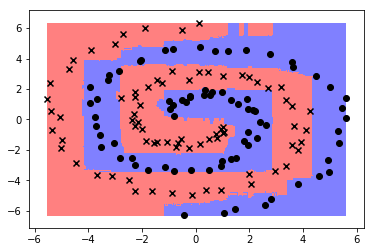

Training error: 0.0000
Testing error:  0.0200


In [33]:
trees=forest(xTrSpiral,yTrSpiral, 50) # compute tree on training data 
visclassifier(lambda X:evalforest(trees,X),xTrSpiral,yTrSpiral)
print("Training error: %.4f" % np.mean(np.sign(evalforest(trees,xTrSpiral)) != yTrSpiral))
print("Testing error:  %.4f" % np.mean(np.sign(evalforest(trees,xTeSpiral)) != yTeSpiral))

<h3>Evaluate Test and Training Error</h3>

<p>The following script evaluates the test and training error of an ensemble of decision trees as we vary the number of trees.</p>

[0]training err = 0.0712	testing err = 0.2429
[1]training err = 0.1174	testing err = 0.3429
[2]training err = 0.0356	testing err = 0.1286
[3]training err = 0.0356	testing err = 0.1571
[4]training err = 0.0036	testing err = 0.1286
[5]training err = 0.0107	testing err = 0.1286
[6]training err = 0.0071	testing err = 0.0857
[7]training err = 0.0036	testing err = 0.0857
[8]training err = 0.0036	testing err = 0.1000
[9]training err = 0.0000	testing err = 0.0714
[10]training err = 0.0000	testing err = 0.0714
[11]training err = 0.0000	testing err = 0.0714
[12]training err = 0.0000	testing err = 0.0714
[13]training err = 0.0000	testing err = 0.0714
[14]training err = 0.0000	testing err = 0.0714
[15]training err = 0.0000	testing err = 0.0714
[16]training err = 0.0000	testing err = 0.0714
[17]training err = 0.0000	testing err = 0.0714
[18]training err = 0.0000	testing err = 0.0714
[19]training err = 0.0000	testing err = 0.0714


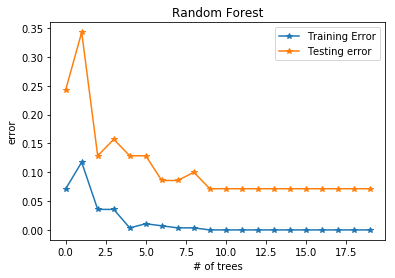

In [34]:
M=20 # max number of trees
err_trB=[]
err_teB=[]
alltrees=forest(xTrIon,yTrIon,M)
for i in range(M):
    trees=alltrees[:i+1]
    trErr = np.mean(np.sign(evalforest(trees,xTrIon)) != yTrIon)
    teErr = np.mean(np.sign(evalforest(trees,xTeIon)) != yTeIon)
    err_trB.append(trErr)
    err_teB.append(teErr)
    print("[%d]training err = %.4f\ttesting err = %.4f" % (i,trErr, teErr))

plt.figure()
line_tr, = plt.plot(range(M), err_trB, '-*', label="Training Error")
line_te, = plt.plot(range(M), err_teB, '-*', label="Testing error")
plt.title("Random Forest")
plt.legend(handles=[line_tr, line_te])
plt.xlabel("# of trees")
plt.ylabel("error")
plt.show()

<h3>1D Interactive Demo</h3>

The next interactive demo shows a 1-dimensional curve, that is fitted with Random Forests. As training data we sample 100 data points from the curve with additive noise. Note how the predicted curve becomes increasingly smooth as you add trees, which should decrease training and testing error. The testing error may be a little higher, but there is no large gap as RFs are quite good at avoiding overfitting. 

<IPython.core.display.Javascript object>


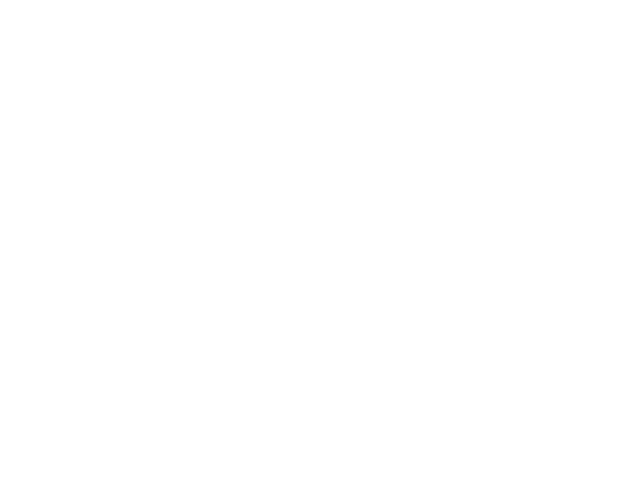

Click to add a tree (shift-click and add 10 trees).


(0, 1)

In [35]:
def onclick_forest(event):
    """
    Visualize forest, including new point
    """
    global xTrain,yTrain,Q,trees
    
    if event.key == 'shift': Q+=10
    else: Q+=1
    Q=min(Q,M)


    plt.cla()    
    plt.xlim((0,1))
    plt.ylim((0,1))
    pTest=evalforest(trees[:Q],xTest);
    pTrain=evalforest(trees[:Q],xTrain);


    errTrain=np.sqrt(np.mean((pTrain-yTrain)**2))
    errTest=np.sqrt(np.mean((pTest-yTest)**2))

    plt.plot(xTrain[:,0],yTrain,'bx')
    plt.plot(xTest[:,0],pTest,'r-')
    plt.plot(xTest[:,0],yTest,'k-')

    plt.legend(['Training data','Prediction'])
    plt.title('(%i Trees)  Error Tr: %2.4f, Te:%2.4f' % (Q,errTrain,errTest))
    plt.show()
    
        
n=100; # number of training points
NOISE=0.05 # magnitude of noise
xTrain=np.array([np.linspace(0,1,n),np.zeros(n)]).T
yTrain=2*np.sin(xTrain[:,0]*3)*(xTrain[:,0]**2)
yTrain+=np.random.randn(yTrain.size)*NOISE;
ntest=300; # density of test points
xTest=np.array([linspace(0,1,ntest),np.zeros(ntest)]).T
yTest=2*np.sin(xTest[:,0]*3)*(xTest[:,0]**2)



    
# Hyper-parameters (feel free to play with them)
M=100 # number of trees
depth=np.inf
trees=forest(xTrain, yTrain, M,maxdepth=depth)
Q=0;

%matplotlib notebook
fig = plt.figure()
cid = fig.canvas.mpl_connect('button_press_event', onclick_forest) 
print('Click to add a tree (shift-click and add 10 trees).');
plt.title('Click to start boosting on this 1D data (Shift-click to add 10 trees).')
plt.plot(xTrain[:,0],yTrain,'*')
plt.plot(xTest[:,0],yTest,'k-')
plt.xlim(0,1)
plt.ylim(0,1)

<h3>2D Interactive Demo</h3>

The following demo visualizes the bagged classifier. Add your own points directly on the graph with click and shift+click to see the prediction boundaries. There will be a delay between clicks as the new classifier is trained.

<IPython.core.display.Javascript object>


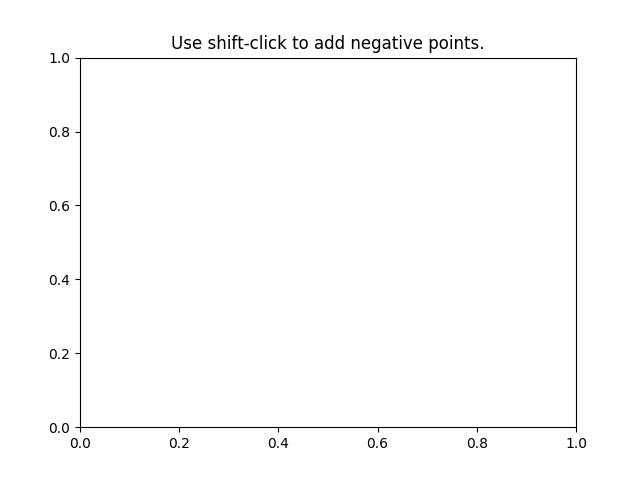

Note: You may notice a delay when adding points to the visualization.


Text(0.5, 1.0, 'Use shift-click to add negative points.')

In [36]:
def onclick_forest(event):
    """
    Visualize forest, including new point
    """
    global xTrain,yTrain,w,b,M
    # create position vector for new point
    pos=np.array([[event.xdata,event.ydata]]) 
    if event.key == 'shift': # add positive point
        color='or'
        label=1
    else: # add negative point
        color='ob'
        label=-1    
    xTrain = np.concatenate((xTrain,pos), axis = 0)
    yTrain = np.append(yTrain, label)
    marker_symbols = ['o', 'x']
    classvals = np.unique(yTrain)
        
    w = np.array(w).flatten()
    
    mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
    
    # return 300 evenly spaced numbers over this interval
    res=300
    xrange = np.linspace(0, 1,res)
    yrange = np.linspace(0, 1,res)
    
    # repeat this matrix 300 times for both axes
    pixelX = repmat(xrange, res, 1)
    pixelY = repmat(yrange, res, 1).T

    xTe = np.array([pixelX.flatten(), pixelY.flatten()]).T

    # get forest
    trees=forest(xTrain,yTrain,M)
    fun = lambda X:evalforest(trees,X)
    # test all of these points on the grid
    testpreds = fun(xTe)
    
    # reshape it back together to make our grid
    Z = testpreds.reshape(res, res)
    # Z[0,0] = 1 # optional: scale the colors correctly
    
    plt.cla()    
    plt.xlim((0,1))
    plt.ylim((0,1))
    # fill in the contours for these predictions
    plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)
    
    for idx, c in enumerate(classvals):
        plt.scatter(xTrain[yTrain == c,0],
            xTrain[yTrain == c,1],
            marker=marker_symbols[idx],
            color='k'
            )
    plt.show()
    
        
xTrain= np.array([[5,6]])
b=yTrIon
yTrain = np.array([1])
w=xTrIon
M=20

%matplotlib notebook
fig = plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
cid = fig.canvas.mpl_connect('button_press_event', onclick_forest)
print('Note: You may notice a delay when adding points to the visualization.')
plt.title('Use shift-click to add negative points.')